# Tutorial Notebook : ANALYTICAL SINOGRAM

In [1]:
import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits import mplot3d

from skimage.transform import iradon, iradon_sart

%matplotlib inline

In [2]:
# import of the phantom library which contain the phantom class
import exact_sinogram as esin

In [3]:
def normalize(x):
    return (x-x.min())/(x.max() - x.min())

# Creation of the Phantom

In [4]:

circle = True
phantom_type = 'ellipses'  #  phantom_type : 'ellipses' (or 'shepp_logan') , 'modified_shepp_logan', 'squares', 'rectangles'
n_points = 300;   # number of pixels

##############################################################################
# Creation of an instance of the Phantom Class,, with the fields: 
# .phantom_type: the type of the phantom "ellipses", "squares" or "rectangles"
# .matrix:       the matrix of the information of the objects that define it 
# .circle:       an option for the sinogram calculation

Phm = esin.Phantom(phantom_type = phantom_type, circle = circle)    
#print(Phm.matrix, Phm.phantom_type":, Phm.circle)
##############################################################################


##############################################################################
# Creation of the matrix-image of the phantom, wth input the number of pixel:
P = Phm.get_phantom(N = n_points)
##############################################################################

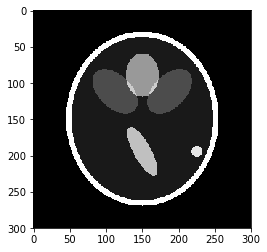

In [5]:
##############################################################################
# Plot of the phantom image
plt.imshow(P, cmap = cm.gray)
plt.show()
##############################################################################

# Calculation of the Sinograms

In [6]:
##############################################################################
# Creation of the vector theta of the angles on which the Radon is calculated
theta_vec_deg = np.linspace(0, 359, 360)
theta_vec_rad = np.deg2rad(theta_vec_deg)
##############################################################################

In [7]:
##############################################################################
# Calculation of the Analytical Sinogram
analytical_sinogram = Phm.get_sinogram(N = n_points, theta_vec = theta_vec_rad)
##############################################################################

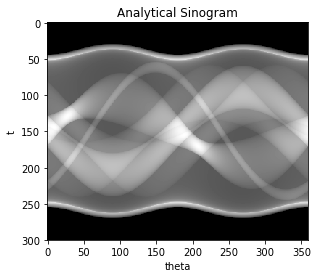

In [8]:
##############################################################################
# Plot of the Analytical Sinogram
plt.imshow(analytical_sinogram, cmap = cm.gray)
plt.xlabel('theta')
plt.ylabel('t')
plt.title('Analytical Sinogram')
plt.show()
##############################################################################

In [9]:
##############################################################################
# Calculation of the Sinogram with the Aproximated formula
sinogram = esin.my_radon(P, theta=theta_vec_deg)
##############################################################################

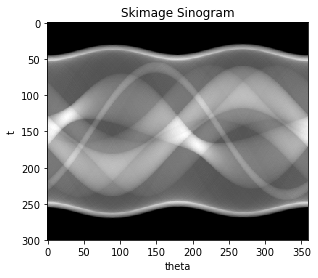

In [10]:
##############################################################################
# Plot of the Sinogram with the Aproximated formula
plt.imshow(sinogram, cmap = cm.gray)
plt.xlabel('theta')
plt.ylabel('t')
plt.title('Skimage Sinogram')
plt.show()
##############################################################################

# Analysis of the results

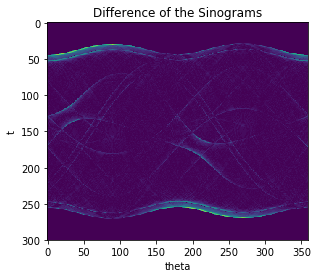

max( |analytical_sinogram - sinogram| ) =  0.09835195575954074


In [11]:
##############################################################################
# Comparison of the two sinograms obtained
err_sinograms = abs(analytical_sinogram - sinogram)
plt.figure();
plt.imshow(err_sinograms)
plt.xlabel('theta')
plt.ylabel('t')
plt.title('Difference of the Sinograms')
plt.show()


print('max( |analytical_sinogram - sinogram| ) = ', np.max(abs(analytical_sinogram - sinogram)))
##############################################################################

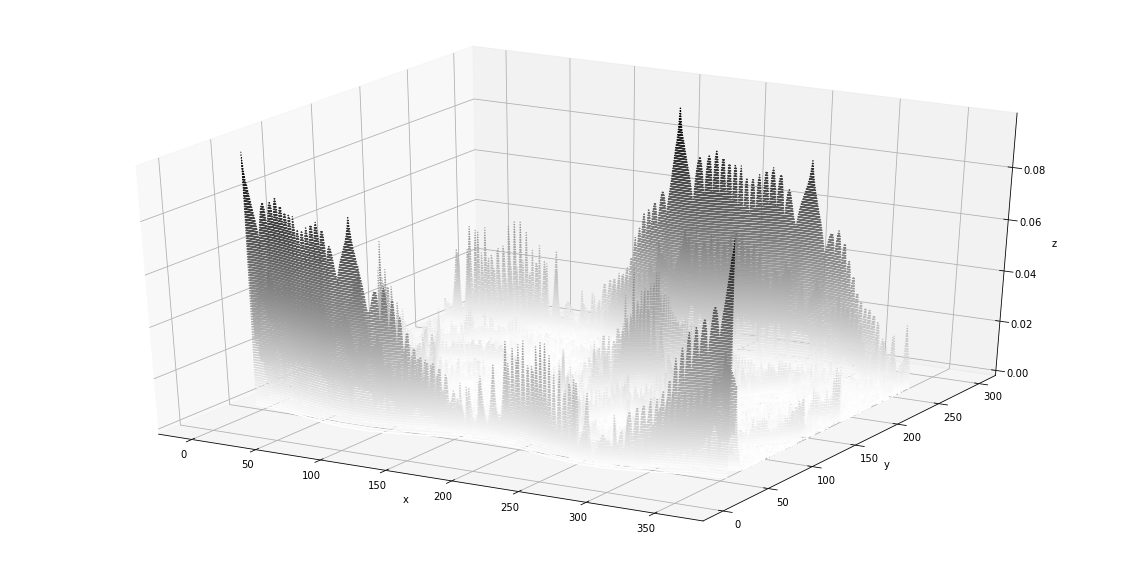

In [12]:
##############################################################################
# 3D Plot of the error :
X, Y = np.meshgrid(np.arange(0,360), np.arange(0,300))
Z = err_sinograms

fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 100, elevation=-50, cmap='binary')
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
##############################################################################

# Backprojection with the iradon function of the library Skimage

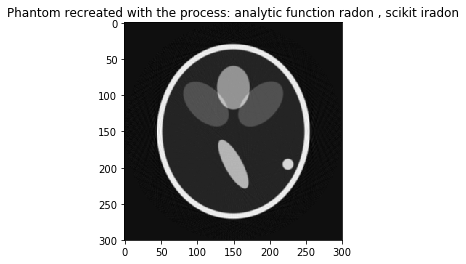

mix,max errors:  0.0 , 1.0


In [13]:
##############################################################################
P_an = normalize(iradon(analytical_sinogram, theta = theta_vec_deg, circle=circle))
plt.imshow(P_an, cmap = cm.gray)
plt.title('Phantom recreated with the process: analytic function radon , scikit iradon')
plt.show()

# errors:
print('mix,max errors: ', P_an.min(),',',P_an.max())
##############################################################################

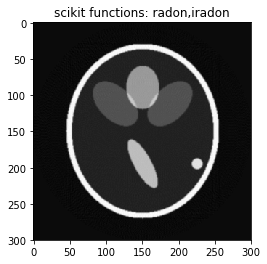

mix,max errors:  0.0 , 1.0


In [14]:
##############################################################################
P_inv = normalize(iradon(sinogram, theta= theta_vec_deg , circle=circle))
plt.imshow(P_inv, cmap = cm.gray)
plt.title('scikit functions: radon,iradon')
plt.show()

# errors:
print('mix,max errors: ', P_inv.min(),',',P_inv.max())
##############################################################################

max(|P_inv-P_an|) =  0.5301723466817574


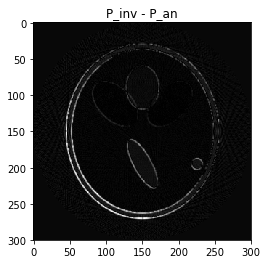

In [15]:
##############################################################################
# Comparison of the recalculated Phantom images
deltaP = np.abs(P_inv-P_an)
plt.imshow(deltaP, cmap = cm.gray)
plt.title('P_inv - P_an')
#errors:
print('max(|P_inv-P_an|) = ', np.max(deltaP))
##############################################################################

max(|P-P_an|) =  0.962287961255773


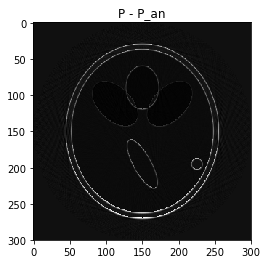

In [16]:
##############################################################################
# Comparison of the recalculated Phantom images
deltaP = np.abs(P-P_an)
plt.imshow(deltaP, cmap = cm.gray)
plt.title('|P - P_an|')
#errors:
print('max(|P-P_an|) = ', np.max(deltaP))
##############################################################################

max(|P-P_inv|) =  0.7523902345045901


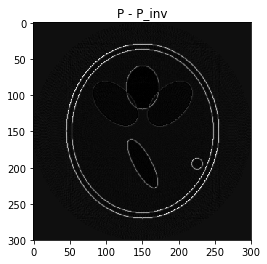

In [18]:
##############################################################################
# Comparison of the recalculated Phantom images
deltaP = np.abs(P-P_inv)
plt.imshow(deltaP, cmap = cm.gray)
plt.title('|P - P_inv|')
#errors:
print('max(|P-P_inv|) = ', np.max(deltaP))
##############################################################################

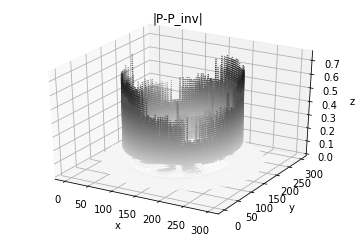

In [19]:
##############################################################################
# 3D Plot of the error of the recalculated Phantom with the approximated radon/iradon
X, Y = np.meshgrid(np.arange(300), np.arange(300))
Z = np.abs(P-P_inv)
fig = plt.figure();
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
plt.title('|P-P_inv|')
plt.show()
##############################################################################

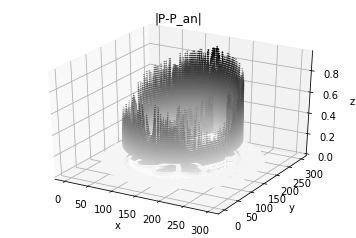

In [20]:
##############################################################################
# 3D Plot of the error of the recalculated Phantom with the analytical radon/iradon
X, Y = np.meshgrid(np.arange(300), np.arange(300))
Z = np.abs(P_an-P)
plt.figure();
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.set_zlabel('z');
plt.title('|P-P_an|')
plt.show()
##############################################################################